In [2]:
import math
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from scipy import stats
import statistics

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
#import TCRemb_code3
import tcremb.TCRemb as TCRemb
import tcremb.ml_utils as ml_utils
import tcremb.data_proc as data_proc

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
tcr_columns = ['cdr3aa','v','j','chain']

# clones from plaque and pbmc

In [162]:
run_name = 'athero_2050_plaque_pbmc'
label = 'site'
clones_path_plaque = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/athero_2050_plaque_all_contig_annotations.csv'
clones_path_pbmc = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/Athero_PBMC_2050_1_clones_TRB.tsv'

In [163]:
data_pbmc = pd.read_csv(clones_path_pbmc,sep='\t')
data_pbmc = data_pbmc.rename({'allVHitsWithScore':'v','allJHitsWithScore':'j','aaSeqCDR3':'cdr3aa','cloneId':'data_id'},axis=1)
data_pbmc['chain']='TRB'
data_pbmc

,data_id,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,v,allDHitsWithScore,j,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,cdr3aa,refPoints,chain
0,0,273279.0,0.051462,4602,0.060072,TGTGCCAGCAGCTTGAACACAGATACGCAGTATTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV5-4*00(196.9),NaN,TRBJ2-3*00(233),TRBC2*00(197.8),427|442|463|0|15||75.0,NaN,22|41|69|17|36||95.0,NaN,TGTGCCAGCAGCTTGAACACAGATACGCAGTATTTT,45,CASSLNTDTQYF,:::::::::0:-1:15:::::17:-2:36:::,TRB
1,2,77363.0,0.014568,1787,0.023327,TGCAGTGCTAGAGAGTGGGGGTCCAACTCTGGGGCCAACGTCCTGA...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,TRBV20-1*00(261.5),TRBD1*00(25),TRBJ2-6*00(262.4),TRBC2*00(171.9),421|435|455|0|14||70.0,18|23|36|16|21||25.0,20|45|73|26|51||125.0,NaN,TGCAGTGCTAGAGAGTGGGGGTCCAACTCTGGGGCCAACGTCCTGA...,45,CSAREWGSNSGANVLTF,:::::::::0:0:14:16:-6:-1:21:26:0:51:::,TRB
2,9,49285.0,0.009281,443,0.005783,TGTGCCAGCAGCTTGAGAGGCAATGAGCAGTTCTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV5-6*00(180.6),NaN,TRBJ2-1*00(218.2),TRBC2*00(210.5),427|442|463|0|15||75.0,NaN,26|42|70|20|36||80.0,NaN,TGTGCCAGCAGCTTGAGAGGCAATGAGCAGTTCTTC,45,CASSLRGNEQFF,:::::::::0:-1:15:::::20:-6:36:::,TRB
3,7,43279.0,0.008150,488,0.006370,TGTGCCAGCAGCCAAGAAGTGGCTAGCGGGGGGTTAAATACGCAGT...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,TRBV4-2*00(328.6),TRBD2*00(40),TRBJ2-3*00(207.6),TRBC2*00(170.7),427|444|464|0|17||85.0,20|28|48|22|30||40.0,27|41|69|37|51||70.0,NaN,TGTGCCAGCAGCCAAGAAGTGGCTAGCGGGGGGTTAAATACGCAGT...,45,CASSQEVASGGLNTQYF,:::::::::0:0:17:22:-4:-4:30:37:-7:51:::,TRB
4,4,38105.0,0.007176,837,0.010926,TGTGCCAGCAGTTTCCAGGGTTTCACTGAAGCTTTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV28*00(403.2),TRBD1*00(25),TRBJ1-1*00(217),TRBC1*00(171.5),427|441|464|0|14||70.0,16|21|36|15|20||25.0,24|40|68|23|39||80.0,NaN,TGTGCCAGCAGTTTCCAGGGTTTCACTGAAGCTTTCTTT,45,CASSFQGFTEAFF,:::::::::0:-3:14:15:-4:-3:20:23:-4:39:::,TRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41301,41181,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTCACCGGGACAGGGTGTTCTACGAGCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(314.7),TRBD1*00(55),TRBJ2-7*00(220),TRBC2*00(172.7),430|444|467|0|14|ST430C|54.0,10|21|36|16|27||55.0,23|39|67|31|47||80.0,NaN,CGTGCCAGCAGCTTCACCGGGACAGGGTGTTCTACGAGCAGTACTTC,45,RASSFTGT_VFYEQYF,:::::::::0:-3:14:16:2:-3:27:31:-3:47:::,TRB
41302,41197,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTAGGCGCGGAGCGGGGGGCCTACGAGCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(304.6),TRBD2*00(30),TRBJ2-7*00(218.1),TRBC2*00(168.1),430|445|467|0|15|ST430C|59.0,22|28|48|22|28||30.0,22|39|67|31|48||85.0,NaN,CGTGCCAGCAGCTTAGGCGCGGAGCGGGGGGCCTACGAGCAGTACTTC,45,RASSLGAERGAYEQYF,:::::::::0:-2:15:22:-6:-4:28:31:-2:48:::,TRB
41303,41221,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTTAAGGCCAGGGGACATGAACACTGAAGCTTTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(327),TRBD1*00(30),TRBJ1-1*00(245.4),TRBC1*00(175),430|446|467|0|16|ST430C|64.0,16|22|36|19|25||30.0,18|40|68|26|48||110.0,NaN,CGTGCCAGCAGCTTAAGGCCAGGGGACATGAACACTGAAGCTTTCTTT,45,RASSLRPGDMNTEAFF,:::::::::0:-1:16:19:-4:-2:25:26:2:48:::,TRB
41304,41247,7.0,0.000001,1,0.000013,CGTGCCAGCAGCTGCCAACCTGATGGGGTCGGAAACATTCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV7-3*00(304.6),NaN,TRBJ2-4*00(220),TRBC2*00(175),430|443|467|0|13|ST430C|49.0,NaN,26|42|70|32|48||80.0,NaN,CGTGCCAGCAGCTGCCAACCTGATGGGGTCGGAAACATTCAGTACTTC,45,RASSCQPDGVGNIQYF,:::::::::0:-4:13:::::32:-6:48:::,TRB


In [164]:
data_pbmc_preped = data_proc.remove_asterisk(data_pbmc,tcr_columns)
data_pbmc_preped = data_proc.remove_backslash(data_pbmc_preped,tcr_columns)
data_pbmc_preped = data_proc.filter_clones_data(data_pbmc_preped,tcr_columns)[['data_id','uniqueMoleculeFraction'] + tcr_columns]

(41306, 20)
(40074, 20)


In [165]:
data_plaque = pd.read_csv(clones_path_plaque)
data_plaque = data_plaque[data_plaque['is_cell']==True]
data_plaque = data_plaque[data_plaque['high_confidence']==True]
data_plaque = data_plaque[-data_plaque['raw_clonotype_id'].isna()]
#data_plaque = data_plaque.rename({'cdr3':'cdr3aa','raw_clonotype_id':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque = data_plaque.rename({'cdr3':'cdr3aa','barcode':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque_b = data_plaque[data_plaque['chain']=='TRB']
data_plaque_b = data_proc.remove_asterisk(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.remove_backslash(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.filter_clones_data(data_plaque_b,tcr_columns)[['data_id','raw_clonotype_id'] + tcr_columns]

(977, 31)
(977, 31)


In [166]:
data_pbmc_preped['site']='pbmc'
data_plaque_b['site']='plaque'
data_tt = pd.concat([data_pbmc_preped,data_plaque_b]).reset_index(drop=True)

In [167]:
data_tt

,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id
0,0,0.060072,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,NaN
1,2,0.023327,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,pbmc,NaN
2,9,0.005783,CASSLRGNEQFF,TRBV5-6,TRBJ2-1,TRB,pbmc,NaN
3,7,0.006370,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3,TRB,pbmc,NaN
4,4,0.010926,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,NaN
...,...,...,...,...,...,...,...,...
41046,TTTCCTCTCTGATTCT-1,NaN,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,clonotype1
41047,TTTGGTTCACGAAACG-1,NaN,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,plaque,clonotype6
41048,TTTGGTTCACGACGAA-1,NaN,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,plaque,clonotype8
41049,TTTGGTTGTCACTTCC-1,NaN,CASSSGIPRSGELFF,TRBV5-1,TRBJ2-2,TRB,plaque,clonotype352


['/home/ykremlyakova/projects/tcr_emb', '/home/ykremlyakova/.conda/envs/py311/lib/python311.zip', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/lib-dynload', '', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages', '../', 'mirpy/']


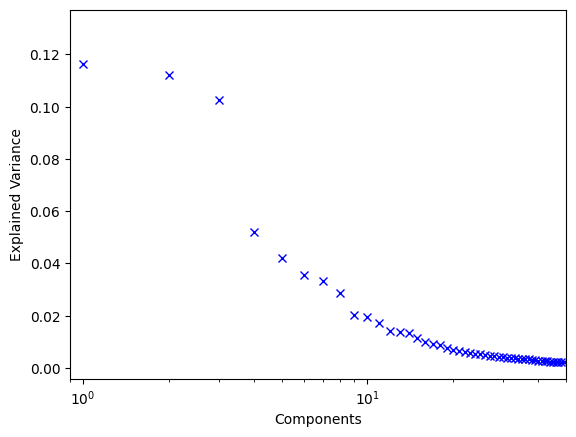

In [168]:
tcremb = TCRemb.TCRemb(run_name, data_tt)
tcremb.tcremb_clonotypes('TRB')
#tcremb.tcremb_dists_count('TRB')
tcremb.tcremb_dists('TRB')
tcremb.tcremb_pca('TRB')
tcremb.tcremb_tsne('TRB')

In [170]:
tcremb.annot['TRB']

,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id,cloneId,annotId
0,0,0.060072,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,NaN,14916,0
1,2,0.023327,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,pbmc,NaN,36047,1
2,9,0.005783,CASSLRGNEQFF,TRBV5-6,TRBJ2-1,TRB,pbmc,NaN,15538,2
3,7,0.006370,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3,TRB,pbmc,NaN,22776,3
4,4,0.010926,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,NaN,7426,4
...,...,...,...,...,...,...,...,...,...,...
40864,TTTCCTCTCTGATTCT-1,NaN,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,clonotype1,14916,40901
40865,TTTGGTTCACGAAACG-1,NaN,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,plaque,clonotype6,36047,40902
40866,TTTGGTTCACGACGAA-1,NaN,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,plaque,clonotype8,29728,40903
40867,TTTGGTTGTCACTTCC-1,NaN,CASSSGIPRSGELFF,TRBV5-1,TRBJ2-2,TRB,plaque,clonotype352,25747,40904


In [174]:
tcremb.annot['TRB']['clone_count'] = tcremb.annot['TRB'].groupby(['site','cloneId'])['annotId'].transform('count')

In [178]:
tcremb.annot['TRB']['big_clone'] = tcremb.annot['TRB']['clone_count'].apply(lambda x: 1 if x >5 else 0)

In [190]:
big_clones_pl = tcremb.annot['TRB'][(tcremb.annot['TRB']['big_clone']==1)&(tcremb.annot['TRB']['site']=='plaque')].drop_duplicates('cloneId').sort_values('clone_count').tail(10)

In [194]:
big_clones_pl = big_clones_pl.rename({'clone_count':'pl_clone_count'},axis=1)

In [191]:
big_clones_list = list(big_clones_pl['cloneId'])

In [192]:
tcremb.annot['TRB'][(tcremb.annot['TRB']['cloneId'].isin(big_clones_list))&(tcremb.annot['TRB']['site']=='pbmc')]

,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id,cloneId,annotId,clone_count,big_clone
0,0,0.060072,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,NaN,14916,0,1,0
1,2,0.023327,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,pbmc,NaN,36047,1,1,0
4,4,0.010926,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,NaN,7426,4,1,0
10,3,0.014019,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,pbmc,NaN,29728,10,1,0
12,1,0.023770,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,pbmc,NaN,12043,12,1,0
38,15,0.003472,CASRGTGTGKSTEAFF,TRBV6-6,TRBJ1-1,TRB,pbmc,NaN,3346,38,1,0
64,16,0.003407,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,pbmc,NaN,5,64,4,0
66,8,0.005939,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,pbmc,NaN,38793,66,1,0
92,21,0.002062,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,TRB,pbmc,NaN,25479,92,1,0
145,47,0.001005,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,pbmc,NaN,29548,145,1,0


In [196]:
tcremb.annot['TRB'][(tcremb.annot['TRB']['site']=='pbmc')].merge(big_clones_pl[['cloneId','pl_clone_count']])

,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id,cloneId,annotId,clone_count,big_clone,pl_clone_count
0,0,0.060072,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,NaN,14916,0,1,0,77
1,2,0.023327,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,pbmc,NaN,36047,1,1,0,47
2,4,0.010926,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,NaN,7426,4,1,0,10
3,3,0.014019,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,pbmc,NaN,29728,10,1,0,45
4,1,0.023770,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,pbmc,NaN,12043,12,1,0,36
5,15,0.003472,CASRGTGTGKSTEAFF,TRBV6-6,TRBJ1-1,TRB,pbmc,NaN,3346,38,1,0,10
6,16,0.003407,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,pbmc,NaN,5,64,4,0,9
7,7503,0.000013,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,pbmc,NaN,5,27812,4,0,9
8,6352,0.000013,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,pbmc,NaN,5,28906,4,0,9
9,7481,0.000013,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,pbmc,NaN,5,34238,4,0,9


<Axes: xlabel='uniqueMoleculeFraction', ylabel='Density'>

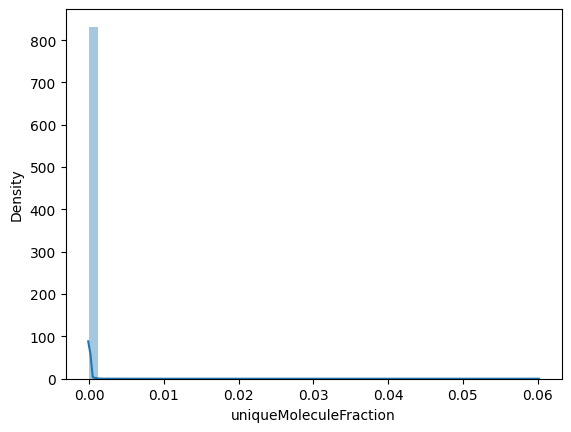

In [187]:
sns.distplot(tcremb.annot['TRB'][(tcremb.annot['TRB']['site']=='pbmc')]['uniqueMoleculeFraction'])

In [202]:
tcremb.annot['TRB'][(tcremb.annot['TRB']['site']=='pbmc')].sort_values('uniqueMoleculeFraction').tail(10)

,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id,cloneId,annotId,clone_count,big_clone
2,9,0.005783,CASSLRGNEQFF,TRBV5-6,TRBJ2-1,TRB,pbmc,NaN,15538,2,3,0
66,8,0.005939,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,pbmc,NaN,38793,66,1,0
3,7,0.006370,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3,TRB,pbmc,NaN,22776,3,1,0
11,6,0.006749,CASSLAEYRAHEQYF,TRBV5-5,TRBJ2-7,TRB,pbmc,NaN,10385,11,1,0
9,5,0.009738,CASSLEGRRVETQYF,TRBV28,TRBJ2-5,TRB,pbmc,NaN,12004,9,1,0
4,4,0.010926,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,NaN,7426,4,1,0
10,3,0.014019,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,pbmc,NaN,29728,10,1,0
1,2,0.023327,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,pbmc,NaN,36047,1,1,0
12,1,0.023770,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,pbmc,NaN,12043,12,1,0
0,0,0.060072,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,NaN,14916,0,1,0


In [203]:
big_clones_pl


,data_id,uniqueMoleculeFraction,cdr3aa,v,j,chain,site,raw_clonotype_id,cloneId,annotId,pl_clone_count,big_clone
39917,AACTCCCAGACTAGAT-1,NaN,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,plaque,clonotype19,29548,39953,9,1
39900,AAAGTAGGTTCGTGAT-1,NaN,CAAGDPQETQYF,TRBV7-2,TRBJ2-5,TRB,plaque,clonotype15,5,39936,9,1
39904,AACACGTAGCTCCCAG-1,NaN,CASRGTGTGKSTEAFF,TRBV6-6,TRBJ1-1,TRB,plaque,clonotype33,3346,39940,10,1
39970,ACGCAGCGTACCGGCT-1,NaN,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,clonotype14,7426,40006,10,1
40030,AGATCTGTCTCATTCA-1,NaN,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,plaque,clonotype9,38793,40066,14,1
39897,AAAGATGTCGGAAACG-1,NaN,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,TRB,plaque,clonotype10,25479,39933,20,1
39916,AACTCCCAGAATTGTG-1,NaN,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,plaque,clonotype7,12043,39952,36,1
39902,AAAGTAGTCCGTCAAA-1,NaN,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,plaque,clonotype8,29728,39938,45,1
39895,AAAGATGCAGACACTT-1,NaN,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,plaque,clonotype2,36047,39931,47,1
39894,AAACGGGGTATGGTTC-1,NaN,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,clonotype1,14916,39930,77,1


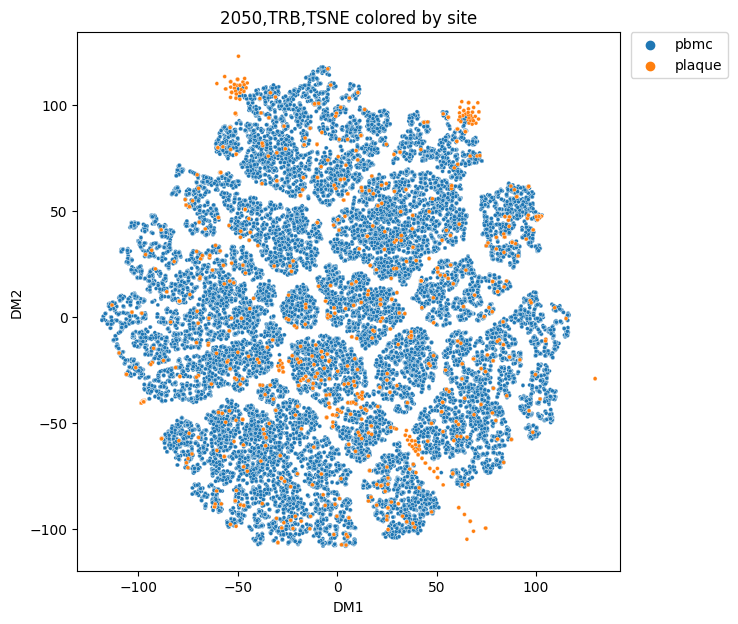

In [12]:
chain = 'TRB'
ml_utils.tsne_plot(pd.concat([tcremb.tsne[chain],tcremb.annot[chain]],axis=1), 'site', f'2050,{chain},TSNE colored by site')

## Clustering

In [13]:
chain='TRB'
n_clusters = 16358
random_state = 8
kmeans = TCRemb.TCRemb_clustering('KMeans')
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.clstr(chain,tcremb, label,model)

mean fraction_matched only clusters: 0.9848797329181109
median fraction_matched only clusters: 1.0
purity:0.9830782558475311


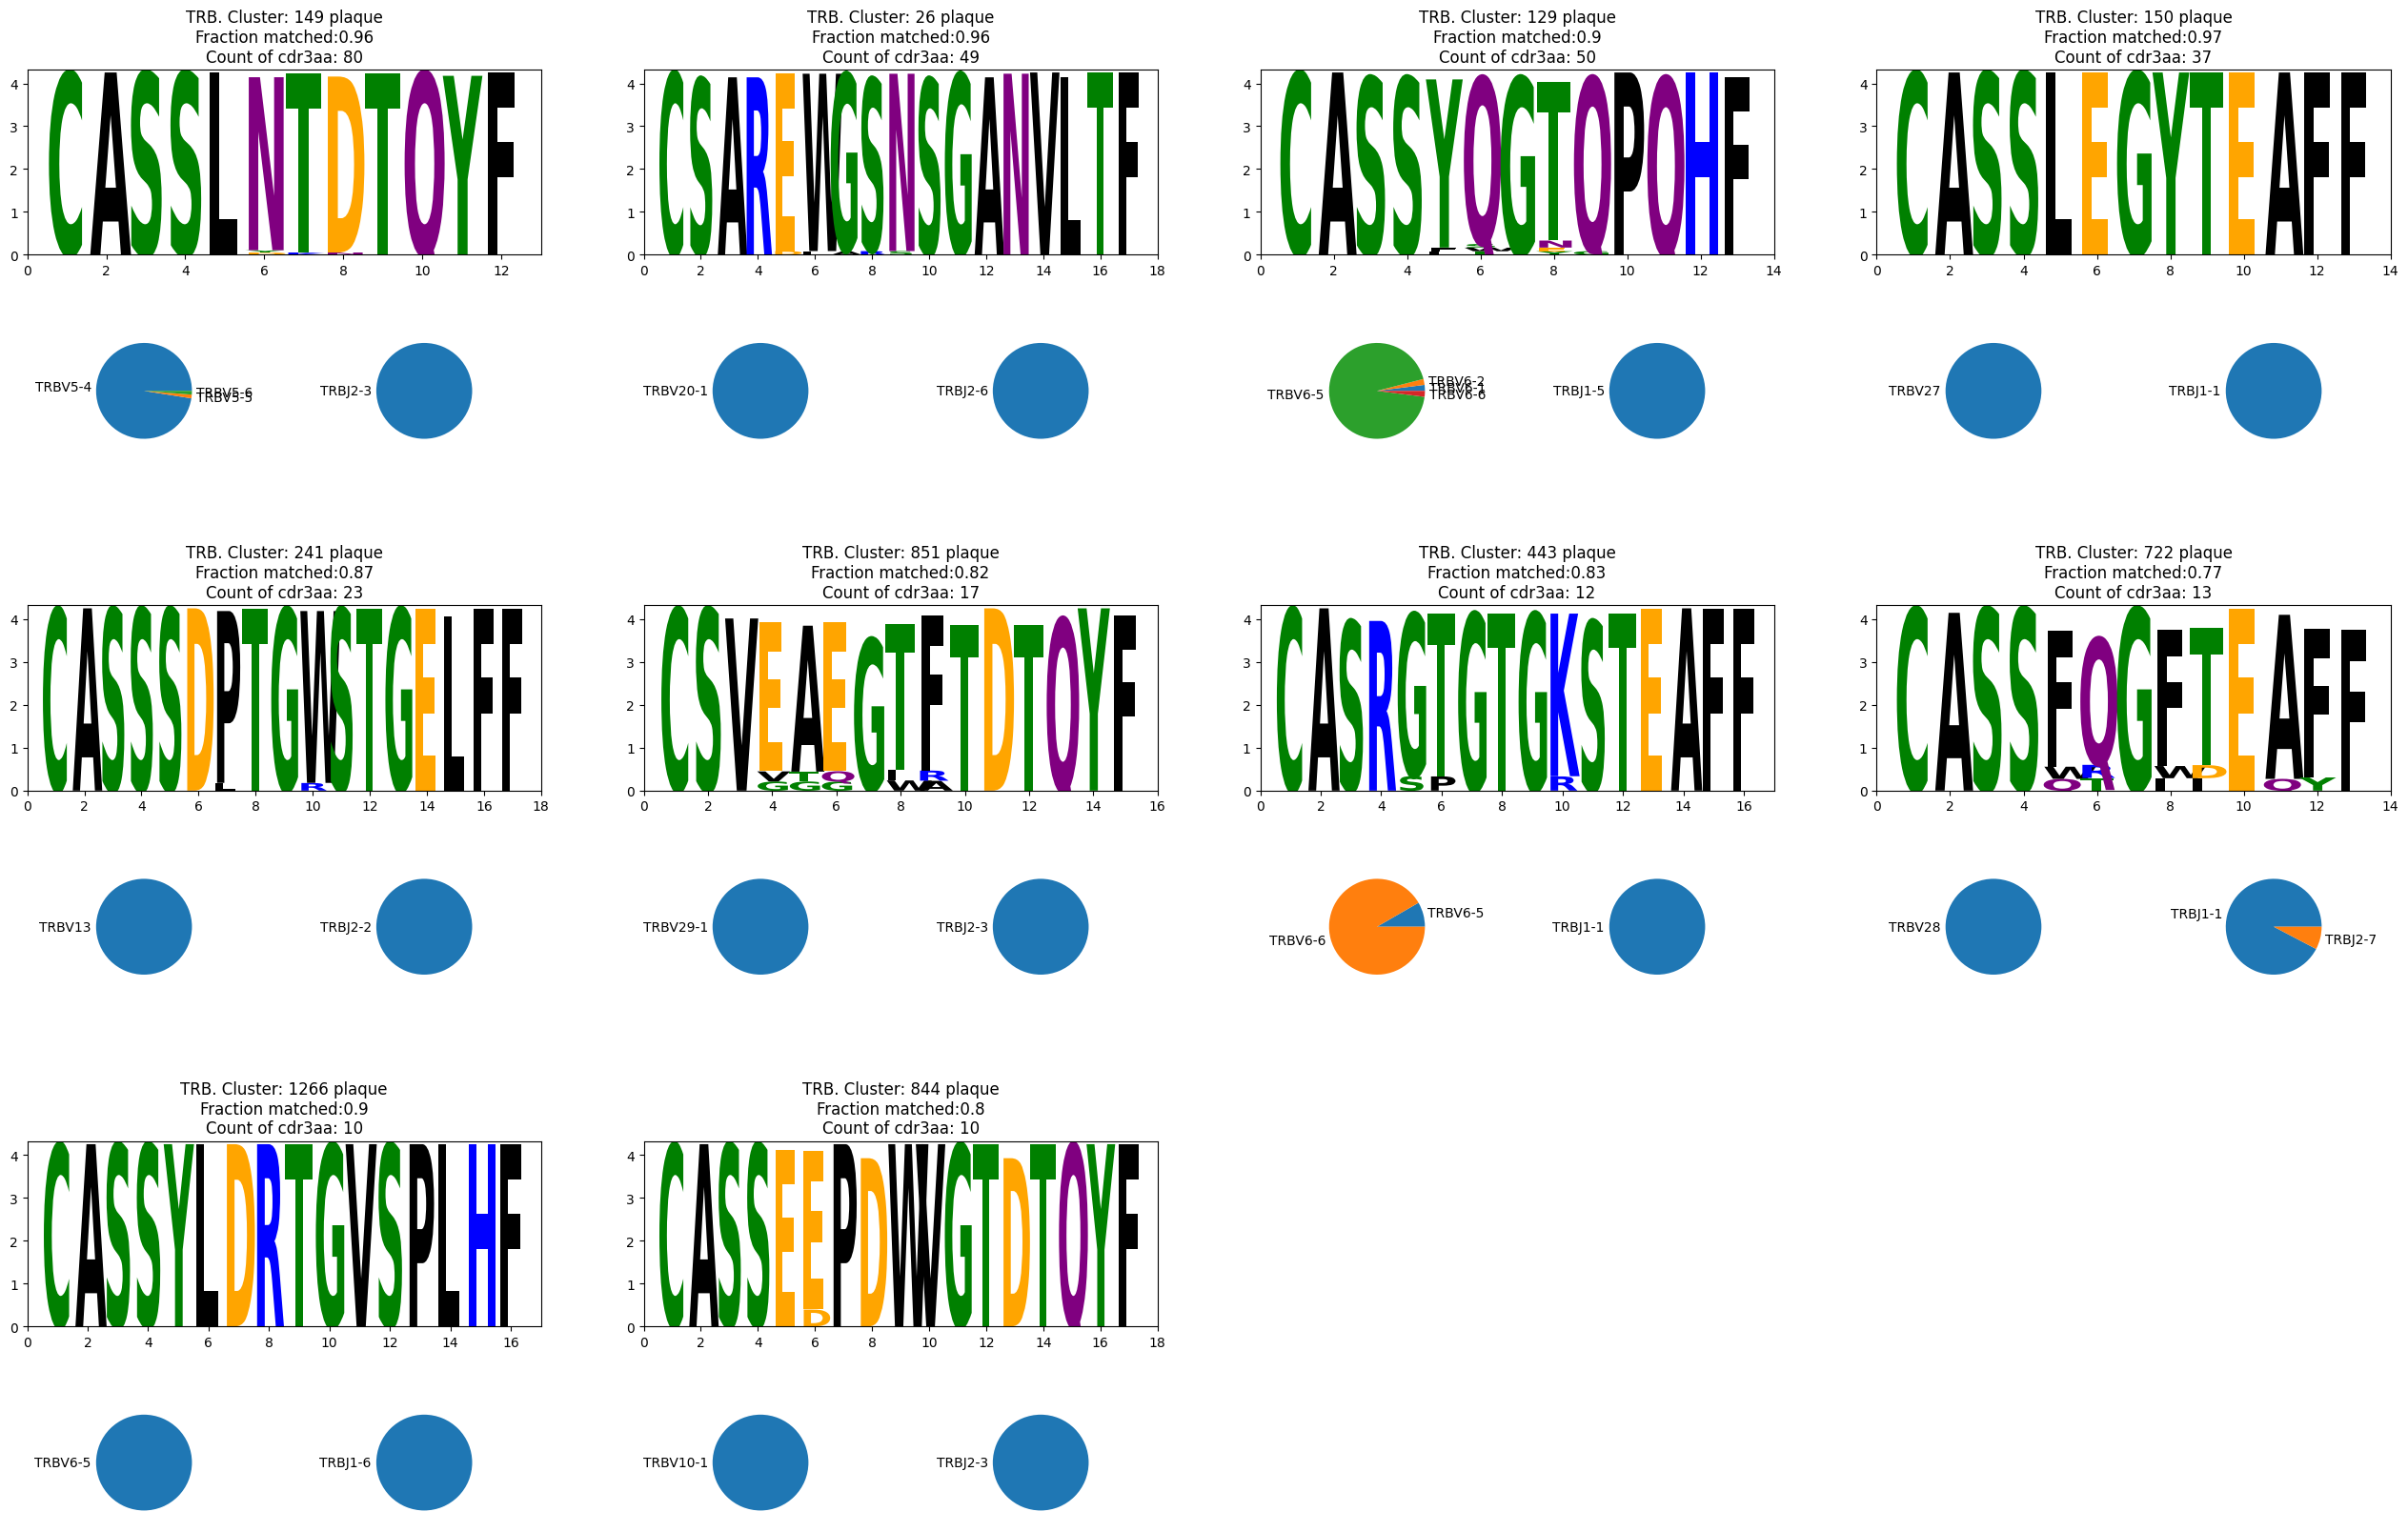

In [14]:
chain = 'TRB'
kmeans.clstrs_motif(tcremb, chain, 10)

In [74]:
clstr_data = pd.merge(kmeans.clstr_labels['TRB'],tcremb.tsne['TRB'])
clstr_data = clstr_data.merge(tcremb.annot['TRB'][tcr_columns + ['annotId','site']])
clstr_data=clstr_data.merge(kmeans.binom_res['TRB'].rename({'site':'clstr_site'},axis=1))

In [87]:
clstr_data


,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,enriched_clstr,DM1,DM2,cdr3aa,v,j,chain,site,clstr_site
0,149,0,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.229103,-39.599892,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,plaque
1,149,5737,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-92.652725,-34.129219,CASSLDKNTQYF,TRBV5-6,TRBJ2-3,TRB,pbmc,plaque
2,149,6568,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-96.695938,-34.316246,CASSLYTDTQYF,TRBV5-5,TRBJ2-3,TRB,pbmc,plaque
3,149,39930,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.229103,-39.599892,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,plaque
4,149,39947,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.242401,-39.590977,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,plaque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40864,9874,40857,plaque,1,976,1,1.0000,0.023881,2.388118e-02,0,0,8.085972,-40.263371,CASSEALVGGVTF,TRBV2,TRBJ1-2,TRB,plaque,plaque
40865,10270,40872,plaque,1,976,1,1.0000,0.023881,2.388118e-02,0,0,-42.008110,8.716068,CASSRFGGGRGTGELFF,TRBV5-1,TRBJ2-2,TRB,plaque,plaque
40866,13458,40877,plaque,1,976,1,1.0000,0.023881,2.388118e-02,0,0,15.696719,-65.680023,CASSPGWGATNEKLFF,TRBV14,TRBJ1-4,TRB,plaque,plaque
40867,10011,40878,plaque,1,976,1,1.0000,0.023881,2.388118e-02,0,0,89.153244,59.981190,CAWSSPGTAANYGYTF,TRBV30,TRBJ1-2,TRB,plaque,plaque


In [54]:
kmeans.binom_res[chain]['cluster'] = kmeans.binom_res[chain]['cluster'].astype(int)

In [35]:
chosen_clusters_df['count_in_clstr_site'] = chosen_clusters_df.groupby(['cluster','site','cdr3aa','v','j'])['cdr3aa'].transform('count')

In [54]:
chosen_clusters_df[chosen_clusters_df['cluster']==1826].drop_duplicates(['site','cdr3aa','v','j'])[['cluster','total_cluster','label_cluster','site','count_in_clstr_site','cdr3aa','v','j']]

,cluster,total_cluster,label_cluster,site,count_in_clstr_site,cdr3,v,j
3,1826,9,plaque,pbmc,1,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3
39961,1826,9,plaque,plaque,8,CASSQEVASGGLNTQYF,TRBV4-2,TRBJ2-3


## Explain why it is not one dot in tsne

In [59]:
clstr_data=clstr_data.merge(tcremb.tsne['TRB'])

In [66]:
clstr_data['plt_clusters']=clstr_data['cluster'].apply(lambda x: x if x in plt_clusters else 'other')

In [61]:
plt_clusters_string = list(map(str, plt_clusters))
plt_clusters_string

['98', '283', '506', '146', '360', '310', '332', '2311', '2551', '356']

In [62]:
custom_palette = ml_utils.make_custom_palette(plt_clusters_string)

In [67]:
clstr_data['plt_clusters'] = clstr_data['plt_clusters'].astype(str)

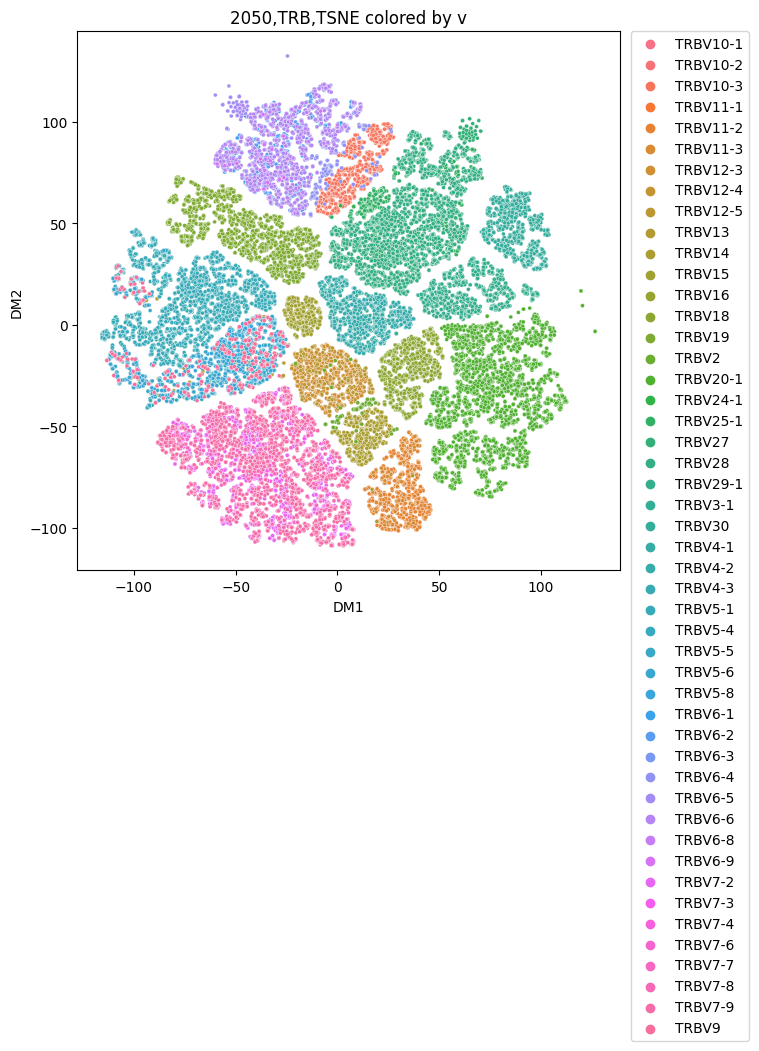

In [110]:
ml_utils.tsne_plot(pd.merge(tcremb.annot['TRB'],tcremb.tsne['TRB']), 'v', f'2050,{chain},TSNE colored by v')

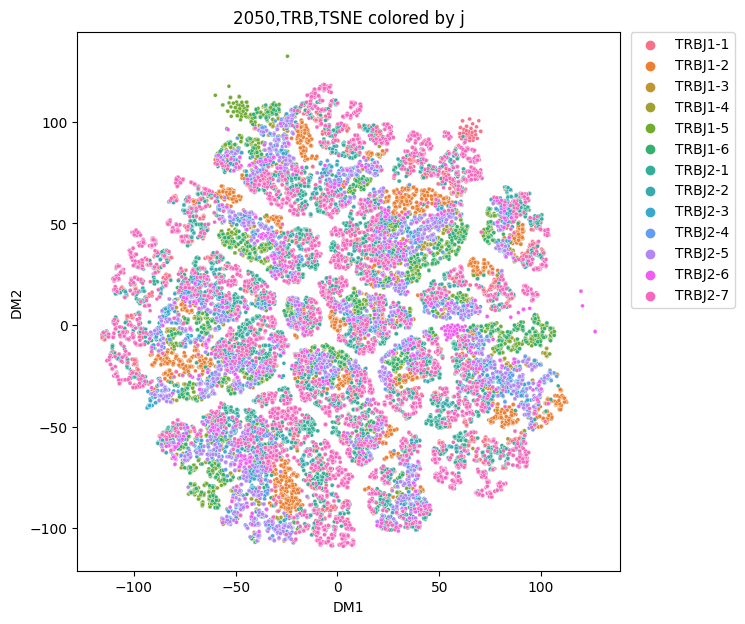

In [111]:
ml_utils.tsne_plot(pd.merge(tcremb.annot['TRB'],tcremb.tsne['TRB']), 'j', f'2050,{chain},TSNE colored by j')

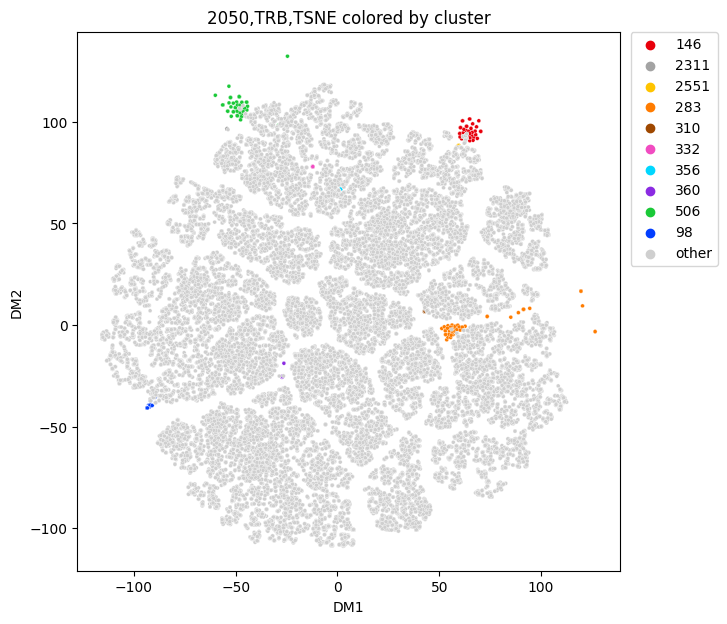

In [79]:
chain = 'TRB'
ml_utils.tsne_plot(clstr_data, 'plt_clusters', f'2050,{chain},TSNE colored by cluster',custom_palette=custom_palette)

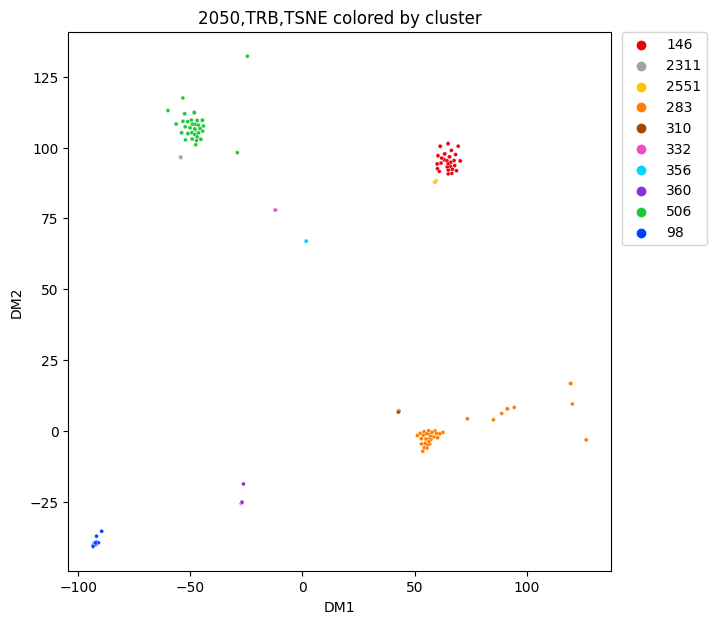

In [83]:
chain = 'TRB'
ml_utils.tsne_plot(clstr_data[clstr_data['plt_clusters']!='other'], 'plt_clusters', f'2050,{chain},TSNE colored by cluster',custom_palette=custom_palette)

In [73]:
clstr_data.columns

Index(['cluster', 'annotId', 'label_cluster', 'total_cluster', 'total_group',
       'count_mached', 'fraction_mached', 'fraction_mached_exp', 'p_value',
       'is_cluster', 'enriched_clstr', 'data_id', 'cdr3', 'v', 'j', 'chain',
       'site', 'cloneId', 'DM1', 'DM2', 'plt_clusters'],
      dtype='object')

In [138]:
tcremb.pca['TRB'][tcremb.pca['TRB']['annotId'].isin([40084,40091,40097,40112])]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,annotId
39903,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40084
39910,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40091
39916,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40097
39931,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869,40112


In [137]:
tcremb.pca['TRB'][tcremb.pca['TRB']['annotId'].isin([40084,40091,40097,40112])].drop('annotId',axis=1).drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
39903,28.819843,-7216.965759,5794.122007,-327.101142,2885.904114,5014.46336,-1004.953584,-2496.847868,-1260.682101,-1842.628827,...,-156.168322,774.511154,515.202,215.211601,128.865401,-21.845023,-1024.212739,127.503005,-686.437191,552.987869


In [84]:
clstr_data[clstr_data['cluster']==356][['cluster','annotId','total_cluster','cdr3aa','v','j','DM1','DM2','cloneId']]

,cluster,annotId,total_cluster,cdr3,v,j,DM1,DM2,cloneId
74,356,74,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.674153,66.947227,5822
19467,356,19583,10,CASSEDPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.680893,66.956642,5784
39914,356,40095,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
39944,356,40126,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40147,356,40329,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40149,356,40331,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673413,66.947456,5822
40297,356,40479,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40451,356,40634,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40538,356,40721,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822
40717,356,40902,10,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,1.673785,66.948158,5822


In [81]:
clstr_data[clstr_data['cluster']==360][['cluster','annotId','total_cluster','cdr3aa','v','j','DM1','DM2','cloneId']]

,cluster,annotId,total_cluster,cdr3,v,j,DM1,DM2,cloneId
92,360,92,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979258,-25.299942,25611
28617,360,28760,23,CASSSDLTGWSTGELFF,TRBV13,TRBJ2-2,-27.323254,-25.678175,25604
38152,360,38331,23,CASSSDPTGRSTGELFF,TRBV13,TRBJ2-2,-26.322882,-18.796103,25609
39898,360,40079,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
39939,360,40121,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
39999,360,40181,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979204,-25.300310,25611
40030,360,40212,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979219,-25.300499,25611
40073,360,40255,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.979052,-25.300709,25611
40111,360,40293,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.978886,-25.300283,25611
40166,360,40348,23,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,-26.978886,-25.300283,25611


# plaque and VDJdb

In [197]:
run_name = 'athero_2050_vdjdb'
label = 'antigen.epitope'
clones_path_plaque = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/athero_2050_plaque_all_contig_annotations.csv'
vdjdb_path = 'data/data_preped/VDJdb_data.csv'
#clones_path_pbmc = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/athero/Athero_PBMC_2050_1_clones_TRB.tsv'

In [198]:
data_preped = pd.read_csv(vdjdb_path,sep='\t')
data_preped['data_resource']='VDJdb'
data_preped['data_type']='train'

data_preped_b = data_preped[data_preped['chain']=='TRB']
data_preped_b['clone_count'] = data_preped_b.groupby(tcr_columns)['data_id'].transform('count')
data_preped_b['big_clone'] = data_preped_b['clone_count'].apply(lambda x: 1 if x >=10 else 0)
data_preped_b['cdr3aa_in_VDJdb'] = 1
data_preped_b.shape

(24146, 38)

In [199]:
data_preped_b[data_preped_b['cdr3aa']=='CASSLNTDTQYF']

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000,data_resource,data_type,clone_count,big_clone,cdr3aa_in_VDJdb
28505,TRB,CASSLNTDTQYF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV7-9,TRBJ2-3,5,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1


In [19]:
data_plaque = pd.read_csv(clones_path_plaque)
data_plaque = data_plaque[data_plaque['is_cell']==True]
data_plaque = data_plaque[data_plaque['high_confidence']==True]
data_plaque = data_plaque[-data_plaque['raw_clonotype_id'].isna()]
#data_plaque = data_plaque.rename({'cdr3':'cdr3aa','raw_clonotype_id':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque = data_plaque.rename({'cdr3':'cdr3aa','barcode':'data_id','v_gene':'v','j_gene':'j'},axis=1)
data_plaque_b = data_plaque[data_plaque['chain']=='TRB']
data_plaque_b = data_proc.remove_asterisk(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.remove_backslash(data_plaque_b,tcr_columns)
data_plaque_b = data_proc.filter_clones_data(data_plaque_b,tcr_columns)[['data_id','raw_clonotype_id'] + tcr_columns]

(977, 31)
(977, 31)


In [20]:
data_plaque_b['data_resource']='10x_plaque'
data_plaque_b['data_type']='pred'
data_plaque_b[label]='no'
data_plaque_b['clone_count'] = data_plaque_b.groupby('raw_clonotype_id')['data_id'].transform('count')
data_plaque_b['big_clone'] = data_plaque_b['clone_count'].apply(lambda x: 1 if x >=10 else 0)
data_plaque_b['cdr3aa_in_VDJdb'] = data_plaque_b.apply(lambda x: 1 if x.cdr3aa in list(data_preped_b['cdr3aa'].drop_duplicates()) else 0, axis=1)

In [21]:
data_plaque_b[data_plaque_b['big_clone']==1]

,data_id,raw_clonotype_id,cdr3aa,v,j,chain,data_resource,data_type,antigen.epitope,clone_count,big_clone,cdr3aa_in_VDJdb
1,AAACGGGGTATGGTTC-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
2,AAAGATGCAGACACTT-1,clonotype2,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,10x_plaque,pred,no,27,1,0
9,AAAGTAGTCCGTCAAA-1,clonotype8,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,10x_plaque,pred,no,14,1,0
16,AACCGCGCATTGTGCA-1,clonotype3,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,10x_plaque,pred,no,25,1,0
18,AACCGCGTCCAAATGC-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
968,TTGTAGGAGTCCCACG-1,clonotype8,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,10x_plaque,pred,no,14,1,0
971,TTTCCTCCAATCTACG-1,clonotype7,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,16,1,1
972,TTTCCTCTCTGATTCT-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
973,TTTGGTTCACGAAACG-1,clonotype6,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,10x_plaque,pred,no,18,1,0


In [22]:
cdr3aa_clone_plaque = list(data_plaque_b[(data_plaque_b['cdr3aa_in_VDJdb']==1)]['cdr3aa'].drop_duplicates())
data_preped_b[data_preped_b['cdr3aa'].isin(cdr3aa_clone_plaque)]

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000,data_resource,data_type,clone_count,big_clone,cdr3aa_in_VDJdb
417,TRB,CSVGAGGTNEKLFF,HomoSapiens,GLCTLVAML,BMLF1,EBV,"23857,27795,23842,23853",TRBV29-1,TRBJ1-4,3,...,EBV,EBV,EBV,EBV,EBV,VDJdb,train,1,0,1
2167,TRB,CASSFQGFTEAFF,HomoSapiens,NLVPMVATV,pp65,CMV,1506,TRBV28,TRBJ1-1,4,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1
2426,TRB,CASSIGTYGYTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,25720,TRBV19,TRBJ1-2,5,...,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,VDJdb,train,1,0,1
2499,TRB,CASSIGVYGYTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,"6397,7422,4673,9621,23289,27885,25789,23305,27...",TRBV19,TRBJ1-2,5,...,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,VDJdb,train,1,0,1
5793,TRB,CASSLGGTEAFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV27,TRBJ1-1,5,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1
11717,TRB,CASSLGGTEAFF,HomoSapiens,KSKRTPMGF,NS5B,HCV,0,TRBV7-9,TRBJ1-1,5,...,HCV,HCV,HCV,HCV,HCV,VDJdb,train,1,0,1
14671,TRB,CSARVGVGNTIYF,HomoSapiens,GLCTLVAML,BMLF1,EBV,"26066,27738,1603",TRBV20-1,TRBJ1-3,4,...,EBV,EBV,EBV,EBV,EBV,VDJdb,train,1,0,1
15940,TRB,CASSLRGNEQFF,HomoSapiens,YLAMPFATPMEAELARRSLA,NY-ESO-1,HomoSapiens,0,TRBV11-3,TRBJ2-1,5,...,HomoSapiens,HomoSapiens,HomoSapiens,HomoSapiens,HomoSapiens,VDJdb,train,1,0,1
17087,TRB,CASSLEGYTEAFF,HomoSapiens,NLVPMVATV,pp65,CMV,"1104,1126,1145,1144,1142,23873",TRBV11-2,TRBJ1-1,5,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1
17355,TRB,CASSLGGTEAFF,HomoSapiens,TSTLQEQIGW,Gag,HIV,0,TRBV5-1,TRBJ1-1,5,...,HIV,HIV,HIV,other,other,VDJdb,train,1,0,1


In [23]:
cdr3aa_big_clone_plaque = list(data_plaque_b[(data_plaque_b['big_clone']==1)&(data_plaque_b['cdr3aa_in_VDJdb']==1)]['cdr3aa'].drop_duplicates())
data_preped_b[data_preped_b['cdr3aa'].isin(cdr3aa_big_clone_plaque)]

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000,data_resource,data_type,clone_count,big_clone,cdr3aa_in_VDJdb
17087,TRB,CASSLEGYTEAFF,HomoSapiens,NLVPMVATV,pp65,CMV,"1104,1126,1145,1144,1142,23873",TRBV11-2,TRBJ1-1,5,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1
28505,TRB,CASSLNTDTQYF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV7-9,TRBJ2-3,5,...,CMV,CMV,CMV,CMV,CMV,VDJdb,train,1,0,1


In [23]:
data_plaque_b[data_plaque_b['cdr3aa'].isin(cdr3aa_big_clone_plaque)]

,data_id,raw_clonotype_id,cdr3aa,v,j,chain,data_resource,data_type,antigen.epitope,clone_count,big_clone,cdr3aa_in_VDJdb
1,AAACGGGGTATGGTTC-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
18,AACCGCGTCCAAATGC-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
23,AACTCCCAGAATTGTG-1,clonotype7,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,16,1,1
28,AACTGGTGTGAGGGAG-1,clonotype7,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,16,1,1
35,AAGGTTCTCTCAAGTG-1,clonotype7,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
921,TTAGGCAGTTGGACCC-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
935,TTCTACAAGTACTTGC-1,clonotype5,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,19,1,1
953,TTGCCGTCAGCTGCTG-1,clonotype1,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,10x_plaque,pred,no,77,1,1
971,TTTCCTCCAATCTACG-1,clonotype7,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,10x_plaque,pred,no,16,1,1


In [24]:
data_tt_v = pd.concat([data_preped_b,data_plaque_b]).reset_index(drop=True)

In [25]:
run_name

'athero_2050_vdjdb'

['/home/ykremlyakova/projects/tcr_emb', '/home/ykremlyakova/.conda/envs/py311/lib/python311.zip', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/lib-dynload', '', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages', '../', 'mirpy/']


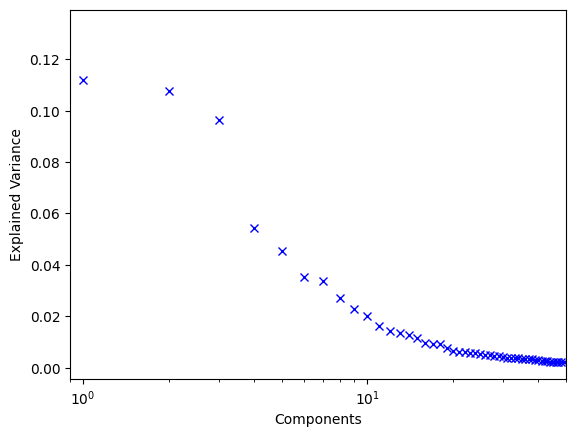

In [26]:
tcremb_vdjdb = TCRemb.TCRemb(run_name)
tcremb_vdjdb.tcremb_clonotypes('TRB',data_tt_v)
#tcremb.tcremb_dists_count('TRB')
tcremb_vdjdb.tcremb_dists('TRB')
tcremb_vdjdb.tcremb_pca('TRB')
tcremb_vdjdb.tcremb_tsne('TRB')

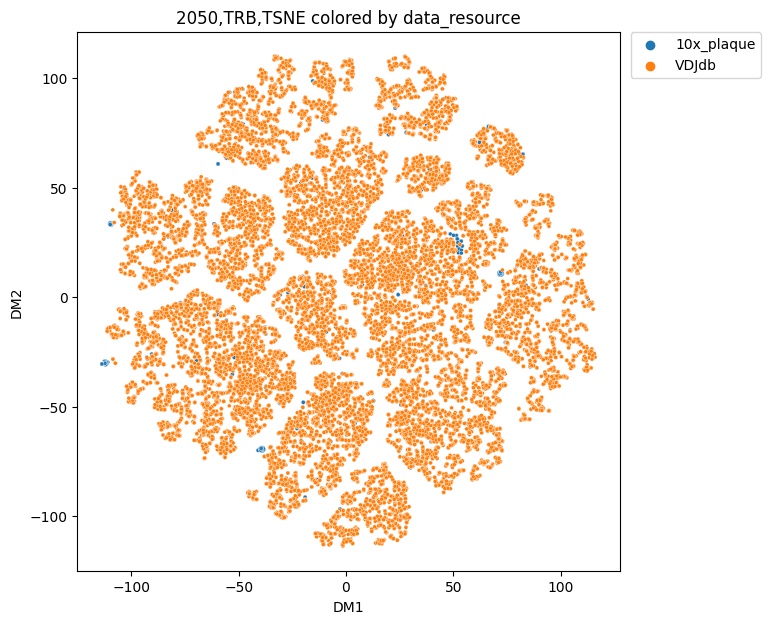

In [27]:
ml_utils.tsne_plot(pd.merge(tcremb_vdjdb.annot['TRB'],tcremb_vdjdb.tsne['TRB']), 'data_resource', f'2050,TRB,TSNE colored by data_resource')

In [28]:
chain='TRB'
n_clusters = 10000
random_state = 8
kmeans_pred_vdjdb = TCRemb.TCRemb_clustering_pred('KMeans')
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans_pred_vdjdb.clstr_pred(chain,tcremb_vdjdb, label,model)

mean fraction_matched only clusters: 0.5382543598759169
median fraction_matched only clusters: 0.5
purity:0.5456362425049966
train mean fraction_matched only clusters: 0.5401241953692778
train median fraction_matched only clusters: 0.5
train purity:0.5434999501147361


In [135]:
chain='TRB'
n_clusters = 11043
random_state = 8
kmeans_vdjdb = TCRemb.TCRemb_clustering('KMeans')
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans_vdjdb.clstr(chain,tcremb_vdjdb, label,model)

mean fraction_matched only clusters: 0.5517494894437465
median fraction_matched only clusters: 0.5
purity:0.5605771164287151


In [136]:
clstr_data_vdjdb = pd.merge(kmeans_pred_vdjdb.clstr_labels['TRB'],tcremb_vdjdb.tsne['TRB'])
clstr_data_vdjdb = clstr_data_vdjdb.merge(tcremb_vdjdb.annot['TRB'][tcr_columns + ['annotId','clone_count','cloneId','big_clone','cdr3aa_in_VDJdb',label,  'antigen.species','data_resource','mhc.class']])


In [75]:
pl_top_clusters = list(kmeans.binom_res['TRB'].sort_values('p_value').head(10)['cluster'])

In [76]:
clstr_data_top = clstr_data[clstr_data['cluster'].isin(pl_top_clusters)]
clstr_data_top

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,enriched_clstr,DM1,DM2,cdr3aa,v,j,chain,site,clstr_site
0,149,0,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.229103,-39.599892,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,pbmc,plaque
1,149,5737,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-92.652725,-34.129219,CASSLDKNTQYF,TRBV5-6,TRBJ2-3,TRB,pbmc,plaque
2,149,6568,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-96.695938,-34.316246,CASSLYTDTQYF,TRBV5-5,TRBJ2-3,TRB,pbmc,plaque
3,149,39930,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.229103,-39.599892,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,plaque
4,149,39947,plaque,80,976,77,0.9625,0.023881,9.859941e-121,1,1,-97.242401,-39.590977,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,plaque,plaque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1266,40418,plaque,10,976,9,0.9000,0.023881,2.472101e-14,1,1,-51.138607,96.075333,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,plaque,plaque
931,1266,40692,plaque,10,976,9,0.9000,0.023881,2.472101e-14,1,1,-51.138607,96.075333,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,plaque,plaque
932,1266,40734,plaque,10,976,9,0.9000,0.023881,2.472101e-14,1,1,-51.138378,96.076019,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,plaque,plaque
933,1266,40778,plaque,10,976,9,0.9000,0.023881,2.472101e-14,1,1,-51.138378,96.076019,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,plaque,plaque


In [77]:
clstr_data_top['clone_in_clstr_count']=clstr_data_top.groupby(['cluster']+tcr_columns)['annotId'].transform('count')

In [78]:
clstr_data_top_nd = clstr_data_top.drop_duplicates(['cluster']+tcr_columns)

In [137]:
clstr_data_vdjdb_nd = clstr_data_vdjdb.drop_duplicates(['cluster']+tcr_columns)

In [138]:
clstr_data_vdjdb_nd = clstr_data_vdjdb_nd.rename({'cluster':'cluster_vdjdb', 'label_cluster':'label_cluster_vdjdb','total_cluster':'total_cluster_vdjdb','fraction_matched':'fraction_matched_vdjdb'},axis=1)


In [139]:
clstr_data_vdjdb_nd

,cluster_vdjdb,annotId,label_cluster_vdjdb,total_cluster_vdjdb,total_group,count_matched,fraction_matched_vdjdb,fraction_matched_exp,p_value,is_cluster,...,j,chain,clone_count,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource,mhc.class
0,9152,0,NLVPMVATV,1,4672,1,1.000000,0.186150,0.186150,0,...,TRBJ2-1,TRB,1,2959,0,1,NLVPMVATV,CMV,VDJdb,MHCI
1,7632,1,GSEHSLAEY,3,1,1,0.333333,0.000040,0.000120,1,...,TRBJ2-7,TRB,1,6016,0,1,YLQPRTFLL,SARS-CoV-2,VDJdb,MHCI
2,5474,2,NLVPMVATV,4,4672,2,0.500000,0.186150,0.159910,1,...,TRBJ2-7,TRB,1,10700,0,1,NLVPMVATV,CMV,VDJdb,MHCI
3,3487,3,GILGFVFTL,3,2977,1,0.333333,0.118615,0.315305,1,...,TRBJ2-5,TRB,1,9024,0,1,NLVPMVATV,CMV,VDJdb,MHCI
4,4761,4,DEEDAIAAY,4,2,1,0.250000,0.000080,0.000319,1,...,TRBJ2-5,TRB,1,1334,0,1,GLCTLVAML,EBV,VDJdb,MHCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25085,6402,25110,no,4,971,2,0.500000,0.038688,0.008524,1,...,TRBJ2-1,TRB,2,9157,0,0,no,NaN,10x_plaque,NaN
25087,4555,25112,GILGFVFTL,4,2977,1,0.250000,0.118615,0.396520,1,...,TRBJ1-2,TRB,2,5102,0,0,no,NaN,10x_plaque,NaN
25090,4073,25115,no,1,971,1,1.000000,0.038688,0.038688,0,...,TRBJ1-1,TRB,1,2929,0,0,no,NaN,10x_plaque,NaN
25091,9036,25116,no,3,971,1,0.333333,0.038688,0.111633,1,...,TRBJ1-4,TRB,1,11387,0,0,no,NaN,10x_plaque,NaN


In [143]:
vdjdb_clusters_to_show = list(clstr_data_top_nd[['cluster','label_cluster','total_cluster','clone_in_clstr_count']+tcr_columns].merge(clstr_data_vdjdb_nd[tcr_columns + ['cluster_vdjdb'
                                                                                                                             ,'label_cluster_vdjdb','total_cluster_vdjdb','fraction_matched_vdjdb','cdr3aa_in_VDJdb','antigen.epitope','antigen.species']]
                                                                                                       , on=tcr_columns)['cluster_vdjdb'].drop_duplicates())

In [141]:
clstr_data_top_nd[['cluster','label_cluster','total_cluster','clone_in_clstr_count']+tcr_columns].merge(clstr_data_vdjdb_nd[tcr_columns + ['cluster_vdjdb'
                                                                                                                             ,'label_cluster_vdjdb','total_cluster_vdjdb','fraction_matched_vdjdb','cdr3aa_in_VDJdb','antigen.epitope','antigen.species']]
                                                                                                       , on=tcr_columns)

,cluster,label_cluster,total_cluster,clone_in_clstr_count,cdr3aa,v,j,chain,cluster_vdjdb,label_cluster_vdjdb,total_cluster_vdjdb,fraction_matched_vdjdb,cdr3aa_in_VDJdb,antigen.epitope,antigen.species
0,149,plaque,80,78,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,25,no,77,1.000000,1,no,NaN
1,26,plaque,49,48,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,249,no,51,0.941176,0,no,NaN
2,722,plaque,13,11,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,208,no,14,0.714286,1,NLVPMVATV,CMV
3,129,plaque,50,46,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,295,no,47,0.957447,0,no,NaN
4,150,plaque,37,37,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,257,no,37,0.972973,1,no,NaN
5,443,plaque,12,11,CASRGTGTGKSTEAFF,TRBV6-6,TRBJ1-1,TRB,395,no,10,1.000000,0,no,NaN
6,851,plaque,17,15,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,187,no,14,1.000000,0,no,NaN
7,844,plaque,10,9,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,122,no,10,0.800000,0,no,NaN
8,241,plaque,23,21,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,TRB,256,no,22,0.909091,0,no,NaN
9,1266,plaque,10,10,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,573,no,12,0.750000,0,no,NaN


In [144]:
clstr_data_vdjdb[clstr_data_vdjdb['cluster'].isin(vdjdb_clusters_to_show)][tcr_columns+['clone_count','cluster','antigen.epitope','antigen.species']].sort_values('cluster')

,cdr3aa,v,j,chain,clone_count,cluster,antigen.epitope,antigen.species
24429,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
24542,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
24783,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
24293,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
24415,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
...,...,...,...,...,...,...,...,...
5600,CASSFMGATEAFF,TRBV27,TRBJ1-1,TRB,1,573,YLQPRTFLL,SARS-CoV-2
24151,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,5,573,no,NaN
24970,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,5,573,no,NaN
15543,CASSQTGWTEAFF,TRBV27,TRBJ1-1,TRB,1,573,SGPLKAEIAQRLED,InfluenzaA


In [148]:
clstr_data_vdjdb_nd[clstr_data_vdjdb_nd['cluster_vdjdb'].isin(vdjdb_clusters_to_show)][tcr_columns+['clone_count','cluster_vdjdb','antigen.epitope','antigen.species']].sort_values('cluster_vdjdb')

,cdr3aa,v,j,chain,clone_count,cluster_vdjdb,antigen.epitope,antigen.species
24128,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,77,25,no,NaN
2781,CASSPSISGTGRQNTEAFF,TRBV5-1,TRBJ1-1,TRB,1,122,SVLYYQNNV,SARS-CoV-2
24147,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,2,122,no,NaN
10663,CASSSDPSGSIAYEQYF,TRBV5-1,TRBJ2-7,TRB,1,122,RAKFKQLL,EBV
24262,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,14,187,no,NaN
1422,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,1,208,NLVPMVATV,CMV
4528,CASSQQGYTEAFF,TRBV28,TRBJ1-1,TRB,1,208,NLVPMVATV,CMV
16968,CASSLLGGLEAFF,TRBV28,TRBJ1-1,TRB,1,208,ELAGIGILTV,HomoSapiens
13955,CASSVQGYTEAFF,TRBV28,TRBJ1-1,TRB,1,208,NLVPMVATV,CMV
24129,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,27,249,no,NaN


In [124]:
clstr_data_vdjdb[clstr_data_vdjdb['cdr3aa']=='CASSEEPDWVGTDTQYF'][tcr_columns+['clone_count',,'cluster','antigen.epitope','antigen.species']]

,cdr3aa,v,j,chain,clone_count,cluster,antigen.epitope,antigen.species
24147,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,2,122,no,NaN
24175,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,3,122,no,NaN
24371,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,2,122,no,NaN
24373,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,3,122,no,NaN
24517,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,1,122,no,NaN
24665,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,3,122,no,NaN
24749,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,2,122,no,NaN
24923,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,3,122,no,NaN


In [131]:
clstr_data_vdjdb_nd[clstr_data_vdjdb_nd['cluster_vdjdb']==208][['cluster_vdjdb','fraction_matched_vdjdb','label_cluster_vdjdb','clone_count'
                                                                ,'antigen.epitope','antigen.species','data_resource']+tcr_columns]

,cluster_vdjdb,fraction_matched_vdjdb,label_cluster_vdjdb,clone_count,antigen.epitope,antigen.species,data_resource,cdr3aa,v,j,chain
1422,208,0.714286,no,1,NLVPMVATV,CMV,VDJdb,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB
4528,208,0.714286,no,1,NLVPMVATV,CMV,VDJdb,CASSQQGYTEAFF,TRBV28,TRBJ1-1,TRB
13955,208,0.714286,no,1,NLVPMVATV,CMV,VDJdb,CASSVQGYTEAFF,TRBV28,TRBJ1-1,TRB
16968,208,0.714286,no,1,ELAGIGILTV,HomoSapiens,VDJdb,CASSLLGGLEAFF,TRBV28,TRBJ1-1,TRB


In [83]:
clstr_data_top_nd[['cluster','label_cluster','total_cluster','clone_in_clstr_count']+tcr_columns].merge(clstr_data_vdjdb_nd[tcr_columns + ['cluster_vdjdb'
                                                                                                                             ,'label_cluster_vdjdb','total_cluster_vdjdb','fraction_matched_vdjdb','cdr3aa_in_VDJdb','antigen.epitope','antigen.species']]
                                                                                                       , on=tcr_columns)

,cluster,label_cluster,total_cluster,clone_in_clstr_count,cdr3aa,v,j,chain,cluster_vdjdb,label_cluster_vdjdb,total_cluster_vdjdb,fraction_matched_vdjdb,cdr3aa_in_VDJdb,antigen.epitope,antigen.species
0,149,plaque,80,78,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,25,no,77,1.000000,1,no,NaN
1,26,plaque,49,48,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,249,no,51,0.941176,0,no,NaN
2,722,plaque,13,11,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,208,no,14,0.714286,1,NLVPMVATV,CMV
3,129,plaque,50,46,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,295,no,47,0.957447,0,no,NaN
4,150,plaque,37,37,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,257,no,37,0.972973,1,no,NaN
5,443,plaque,12,11,CASRGTGTGKSTEAFF,TRBV6-6,TRBJ1-1,TRB,395,no,10,1.000000,0,no,NaN
6,851,plaque,17,15,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,187,no,14,1.000000,0,no,NaN
7,844,plaque,10,9,CASSEEPDWVGTDTQYF,TRBV10-1,TRBJ2-3,TRB,122,no,10,0.800000,0,no,NaN
8,241,plaque,23,21,CASSSDPTGWSTGELFF,TRBV13,TRBJ2-2,TRB,256,no,22,0.909091,0,no,NaN
9,1266,plaque,10,10,CASSYLDRTGVSPLHF,TRBV6-5,TRBJ1-6,TRB,573,no,12,0.750000,0,no,NaN


In [84]:
print(pl_top_clusters)

[149, 26, 129, 150, 241, 851, 443, 722, 1266, 844]


In [130]:
clstr_data_top_nd[clstr_data_top_nd['cluster']==722].drop(['site','clstr_site'],axis=1)

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,enriched_clstr,DM1,DM2,cdr3aa,v,j,chain,clone_in_clstr_count
151,722,4,plaque,13,976,10,0.769231,0.023881,1.615593e-14,1,1,60.506924,88.664574,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,11
152,722,17266,plaque,13,976,10,0.769231,0.023881,1.615593e-14,1,1,60.573757,88.796036,CASSQTGIIEAFF,TRBV28,TRBJ1-1,TRB,1
153,722,25399,plaque,13,976,10,0.769231,0.023881,1.615593e-14,1,1,60.986931,88.140167,CASSWRGWDEQYF,TRBV28,TRBJ2-7,TRB,1


In [21]:
clstr_data.columns


Index(['cluster', 'annotId', 'label_cluster', 'total_cluster', 'total_group',
       'count_matched', 'fraction_matched', 'fraction_matched_exp', 'p_value',
       'is_cluster', 'enriched_clstr', 'label_cluster_train',
       'fraction_matched_train', 'p_value_train', 'is_cluster_train',
       'enriched_clstr_train', 'DM1', 'DM2', 'cdr3aa', 'v', 'j', 'chain',
       'clone_count', 'cloneId', 'big_clone', 'cdr3aa_in_VDJdb',
       'antigen.epitope', 'antigen.species', 'data_resource', 'mhc.class'],
      dtype='object')

In [29]:
clstr_data[(clstr_data['big_clone']==1)&(clstr_data['fraction_matched_train']>0.5)].sort_values('p_value_train')['cluster'].drop_duplicates()

24408    603
24914     85
Name: cluster, dtype: int32

In [51]:
clstr_data[(clstr_data['big_clone']==1)].drop_duplicates('cloneId').sort_values('p_value_train')[['cluster','label_cluster','label_cluster_train','fraction_matched_train','fraction_matched','clone_count'] + tcr_columns + ['cloneId','big_clone','cdr3aa_in_VDJdb','antigen.epitope','antigen.species','data_resource']]


,cluster,label_cluster,label_cluster_train,fraction_matched_train,fraction_matched,clone_count,cdr3aa,v,j,chain,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource
2471,264,SMDWFQGQM,VLDLFQGQL,0.090909,0.090909,10,CASSRDTVNTEAFF,TRBV10-1,TRBJ1-1,TRB,15467,1,1,MMDFFNAQM,HomoSapiens,VDJdb
705,242,EMMLFDWKV,TLEELDWCL,0.071429,0.071429,12,CASSPSGLAGSNLGNEQFF,TRBV11-3,TRBJ2-1,TRB,13148,1,1,KLEQLDWTV,HomoSapiens,VDJdb
24150,603,no,VLEETSVML,1.000000,0.972973,16,CASSLEGYTEAFF,TRBV27,TRBJ1-1,TRB,8020,1,1,no,NaN,10x_plaque
24136,85,no,GILGFVFTL,1.000000,0.957447,14,CASSYQGTQPQHF,TRBV6-5,TRBJ1-5,TRB,18930,1,0,no,NaN,10x_plaque
24129,10,no,NLVPMVATV,0.333333,0.941176,27,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24128,153,no,NaN,NaN,1.000000,77,CASSLNTDTQYF,TRBV5-4,TRBJ2-3,TRB,9685,1,1,no,NaN,10x_plaque
24262,230,no,NaN,NaN,1.000000,14,CSVEAEGTFTDTQYF,TRBV29-1,TRBJ2-3,TRB,23494,1,0,no,NaN,10x_plaque


In [52]:
big_clones_clusters = list(clstr_data[(clstr_data['big_clone']==1)]['cluster'].drop_duplicates())
clstr_data[(clstr_data['cluster'].isin(big_clones_clusters))&(clstr_data['data_resource']=='VDJdb')]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,j,chain,clone_count,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource,mhc.class
705,242,708,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,KLEQLDWTV,HomoSapiens,VDJdb,MHCI
2247,242,2252,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,VLEEVDWLI,HomoSapiens,VDJdb,MHCI
2471,264,2476,SMDWFQGQM,11,2,1,0.090909,0.000080,8.762147e-04,1,...,TRBJ1-1,TRB,10,15467,1,1,MMDFFNAQM,HomoSapiens,VDJdb,MHCI
2945,242,2950,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,NVEYYDIKL,HomoSapiens,VDJdb,MHCI
3173,242,3179,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,RMEQVDWTV,synthetic,VDJdb,MHCI
4530,85,4537,no,47,971,45,0.957447,0.038688,2.763244e-61,1,...,TRBJ2-3,TRB,1,6966,0,1,GILGFVFTL,InfluenzaA,VDJdb,MHCI
4989,264,4997,SMDWFQGQM,11,2,1,0.090909,0.000080,8.762147e-04,1,...,TRBJ1-1,TRB,10,15467,1,1,NMMWFQGQL,synthetic,VDJdb,MHCI
6073,242,6082,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,TMETIDWKV,HomoSapiens,VDJdb,MHCI
7138,603,7147,no,37,971,36,0.972973,0.038688,5.063166e-50,1,...,TRBJ2-3,TRB,1,9866,0,1,VLEETSVML,CMV,VDJdb,MHCI
8074,242,8083,EMMLFDWKV,14,1,1,0.071429,0.000040,5.576689e-04,1,...,TRBJ2-1,TRB,12,13148,1,1,NMEYMTWDV,HomoSapiens,VDJdb,MHCI


In [53]:
print(big_clones_clusters)

[242, 264, 153, 10, 85, 603, 230]


In [66]:
clstr_data[clstr_data['cluster']==10][['cluster','label_cluster','label_cluster_train','fraction_matched_train','fraction_matched','clone_count'] + tcr_columns + ['cloneId','big_clone','cdr3aa_in_VDJdb','antigen.epitope','antigen.species','data_resource']]


,cluster,label_cluster,label_cluster_train,fraction_matched_train,fraction_matched,clone_count,cdr3aa,v,j,chain,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource
13388,10,no,NLVPMVATV,0.333333,0.941176,1,CASSLNPDTQYF,TRBV5-6,TRBJ2-3,TRB,9631,0,1,KLMNIQQKL,HomoSapiens,VDJdb
14875,10,no,NLVPMVATV,0.333333,0.941176,1,CASTRSADTQYF,TRBV5-6,TRBJ2-3,TRB,19849,0,1,NLVPMVATV,CMV,VDJdb
15934,10,no,NLVPMVATV,0.333333,0.941176,1,CASSLGPDTQYF,TRBV5-4,TRBJ2-3,TRB,8685,0,1,FLLNKEMYL,SARS-CoV-2,VDJdb
24129,10,no,NLVPMVATV,0.333333,0.941176,27,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24160,10,no,NLVPMVATV,0.333333,0.941176,27,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24161,10,no,NLVPMVATV,0.333333,0.941176,18,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24238,10,no,NLVPMVATV,0.333333,0.941176,2,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,0,0,no,NaN,10x_plaque
24245,10,no,NLVPMVATV,0.333333,0.941176,27,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24278,10,no,NLVPMVATV,0.333333,0.941176,18,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque
24294,10,no,NLVPMVATV,0.333333,0.941176,18,CSAREWGSNSGANVLTF,TRBV20-1,TRBJ2-6,TRB,22457,1,0,no,NaN,10x_plaque


In [48]:
clstr_data[(clstr_data['cdr3aa']=='CASSLNTDTQYF')&(clstr_data['data_resource']=='VDJdb')]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,j,chain,clone_count,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource,mhc.class
19048,1434,19064,TPGPGVRYPL,6,69,2,0.333333,0.002749,0.000113,1,...,TRBJ2-3,TRB,1,9686,0,1,NLVPMVATV,CMV,VDJdb,MHCI


In [45]:
clstr_data[(clstr_data['cluster']==153)&(clstr_data['data_resource']=='VDJdb')][['cluster','label_cluster','label_cluster_train','fraction_matched_train','fraction_matched','clone_count'] + tcr_columns + ['cloneId','big_clone','cdr3aa_in_VDJdb','antigen.epitope','antigen.species','data_resource']]


,cluster,label_cluster,label_cluster_train,fraction_matched_train,fraction_matched,clone_count,cdr3aa,v,j,chain,cloneId,big_clone,cdr3aa_in_VDJdb,antigen.epitope,antigen.species,data_resource


In [50]:
clstr_data[(clstr_data['label_cluster']!='no')&(clstr_data['antigen.epitope']=='no')]


,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,DM2,cdr3aa,v,j,chain,cloneId,antigen.epitope,antigen.species,data_resource,mhc.class
24128,1073,24147,GILGFVFTL,5,2977,2,0.400000,0.118464,1.099482e-01,1,...,-37.058262,CASSPTSYGEQYF,TRBV7-6,TRBJ2-7,TRB,13425,no,NaN,10x_plaque,NaN
24138,1647,24157,NLVPMVATV,4,4672,3,0.750000,0.185913,2.211947e-02,1,...,82.985809,CSASGSIGVSGKGQFF,TRBV20-1,TRBJ2-1,TRB,22965,no,NaN,10x_plaque,NaN
24142,3271,24161,GILGFVFTL,4,2977,1,0.250000,0.118464,3.961067e-01,1,...,37.096035,CASSYSGDGSETQYF,TRBV12-3,TRBJ2-5,TRB,19097,no,NaN,10x_plaque,NaN
24149,6167,24168,VLEETSVML,2,16,1,0.500000,0.000637,1.272973e-03,1,...,13.532605,CASSLDRGQTDTQYF,TRBV11-2,TRBJ2-3,TRB,7817,no,NaN,10x_plaque,NaN
24169,1758,24188,GILGFVFTL,10,2977,5,0.500000,0.118464,3.508736e-03,1,...,20.398666,CASKTVNSNQPQHF,TRBV19,TRBJ1-5,TRB,1495,no,NaN,10x_plaque,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25115,9934,25137,ELAGIGILTV,2,1100,1,0.500000,0.043772,8.562875e-02,1,...,-97.482925,CASSSNTRTRDTQYF,TRBV5-4,TRBJ2-3,TRB,16502,no,NaN,10x_plaque,NaN
25119,7995,25141,NLVPMVATV,3,4672,2,0.666667,0.185913,9.083950e-02,1,...,-89.369171,CASSFRDNYGYTF,TRBV5-1,TRBJ1-2,TRB,5103,no,NaN,10x_plaque,NaN
25122,725,25144,CLGGLLTMV,10,24,4,0.400000,0.000955,1.739013e-10,1,...,-31.194233,CASSADGMNTEAFF,TRBV10-2,TRBJ1-1,TRB,2930,no,NaN,10x_plaque,NaN
25123,965,25145,GILGFVFTL,6,2977,2,0.333333,0.118464,1.523226e-01,1,...,-5.989481,CASSMTRGRSEKLFF,TRBV19,TRBJ1-4,TRB,11392,no,NaN,10x_plaque,NaN


In [52]:
clstr_data[(clstr_data['label_cluster']=='no')&(clstr_data['antigen.epitope']!='no')&(clstr_data['antigen.species']=='HomoSapiens')]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,DM2,cdr3aa,v,j,chain,cloneId,antigen.epitope,antigen.species,data_resource,mhc.class
1182,9032,1185,no,2,1003,1,0.500000,0.039912,7.823191e-02,1,...,32.737980,CASSQGQGRGNTEAFF,TRBV4-3,TRBJ1-1,TRB,14667,ELAGIGILTV,HomoSapiens,VDJdb,MHCI
1279,3572,1282,no,3,1003,2,0.666667,0.039912,4.651851e-03,1,...,28.105797,CASRIAGSNNEQFF,TRBV27,TRBJ2-1,TRB,2280,ELAGIGILTV,HomoSapiens,VDJdb,MHCI
1740,3994,1745,no,4,1003,2,0.500000,0.039912,9.056992e-03,1,...,-14.733681,CASSPNRVYGYTF,TRBV10-1,TRBJ1-2,TRB,12577,LLEFYLAMPFATP,HomoSapiens,VDJdb,MHCII
1927,7164,1932,no,3,1003,1,0.333333,0.039912,1.150219e-01,1,...,-75.852638,CASSLVGEGRTEAFF,TRBV5-1,TRBJ1-1,TRB,10802,ELAGIGILTV,HomoSapiens,VDJdb,MHCI
2176,661,2181,no,3,1003,2,0.666667,0.039912,4.651851e-03,1,...,60.246593,CAWSVGAGVGEQYF,TRBV30,TRBJ2-7,TRB,21313,KLMNIQQKL,HomoSapiens,VDJdb,MHCI
5517,5076,5525,no,3,1003,1,0.333333,0.039912,1.150219e-01,1,...,-14.474393,CASSEVGQGFNGYTF,TRBV25-1,TRBJ1-2,TRB,4408,VAANIVLTV,HomoSapiens,VDJdb,MHCI
6217,2435,6226,no,3,1003,1,0.333333,0.039912,1.150219e-01,1,...,-71.939217,CASSLAGQTSYEQYF,TRBV7-8,TRBJ2-7,TRB,7377,NLSALGIFST,HomoSapiens,VDJdb,MHCI
7675,2046,7684,no,4,1003,3,0.750000,0.039912,2.467098e-04,1,...,0.413787,CASSLSFRQGLREQYF,TRBV28,TRBJ2-7,TRB,10212,VVVGAVGVGK,HomoSapiens,VDJdb,MHCI
8189,246,8198,no,21,1003,20,0.952381,0.039912,2.125974e-27,1,...,-104.069550,CASSQPLTGWNTGELFF,TRBV5-6,TRBJ2-2,TRB,14957,ELAGIGILTV,HomoSapiens,VDJdb,MHCI
9201,7429,9211,no,6,1003,2,0.333333,0.039912,2.146362e-02,1,...,104.758270,CSVPWGSYGYTF,TRBV29-1,TRBJ1-2,TRB,23991,ELAGIGILTV,HomoSapiens,VDJdb,MHCI


In [54]:
clstr_data[clstr_data['cluster']==1172]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,DM2,cdr3aa,v,j,chain,cloneId,antigen.epitope,antigen.species,data_resource,mhc.class
19691,1172,19709,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.472649,CASSFGQGNTGELFF,TRBV12-3,TRBJ2-2,TRB,4759,NLVPMVATV,CMV,VDJdb,MHCI
19869,1172,19888,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.799664,CASSLIPGVTGELFF,TRBV12-3,TRBJ2-2,TRB,9247,YLEPGPVTV,HomoSapiens,VDJdb,MHCI
24828,1172,24850,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.604244,CASSLYSGSTGELFF,TRBV12-4,TRBJ2-2,TRB,11215,no,NaN,10x_plaque,NaN
24890,1172,24912,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.603924,CASSLYSGSTGELFF,TRBV12-4,TRBJ2-2,TRB,11215,no,NaN,10x_plaque,NaN
24902,1172,24924,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.604164,CASSLYSGSTGELFF,TRBV12-4,TRBJ2-2,TRB,11215,no,NaN,10x_plaque,NaN
25098,1172,25120,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.603977,CASSLYSGSTGELFF,TRBV12-4,TRBJ2-2,TRB,11215,no,NaN,10x_plaque,NaN
25120,1172,25142,no,7,1003,5,0.714286,0.039912,0.000002,1,...,36.602745,CASSLYSGSTGELFF,TRBV12-4,TRBJ2-2,TRB,11215,no,NaN,10x_plaque,NaN


In [59]:
clstr_data[clstr_data['cluster']==2165]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,DM2,cdr3aa,v,j,chain,cloneId,antigen.epitope,antigen.species,data_resource,mhc.class
17090,2165,17104,no,3,1003,2,0.666667,0.039912,0.004652,1,...,-55.148743,CASNLGIPASYEQYF,TRBV6-1,TRBJ2-7,TRB,1708,NLSALGIFST,HomoSapiens,VDJdb,MHCI
24206,2165,24226,no,3,1003,2,0.666667,0.039912,0.004652,1,...,-54.864555,CASSLGLAASYEQYF,TRBV6-5,TRBJ2-7,TRB,8596,no,NaN,10x_plaque,NaN
24594,2165,24615,no,3,1003,2,0.666667,0.039912,0.004652,1,...,-54.864555,CASSLGLAASYEQYF,TRBV6-5,TRBJ2-7,TRB,8596,no,NaN,10x_plaque,NaN


In [44]:
clstr_data[clstr_data['cluster']==3572]

,cluster,annotId,label_cluster,total_cluster,total_group,count_matched,fraction_matched,fraction_matched_exp,p_value,is_cluster,...,DM1,DM2,cdr3aa,v,j,chain,antigen.epitope,antigen.species,data_resource,mhc.class
1279,3572,1282,no,3,1003,2,0.666667,0.039912,0.004652,1,...,42.178715,28.105797,CASRIAGSNNEQFF,TRBV27,TRBJ2-1,TRB,ELAGIGILTV,HomoSapiens,VDJdb,MHCI
24694,3572,24715,no,3,1003,2,0.666667,0.039912,0.004652,1,...,41.827641,27.900299,CASRTSGSYNEQFF,TRBV27,TRBJ2-1,TRB,no,NaN,10x_plaque,NaN
24722,3572,24743,no,3,1003,2,0.666667,0.039912,0.004652,1,...,41.826649,27.900299,CASRTSGSYNEQFF,TRBV27,TRBJ2-1,TRB,no,NaN,10x_plaque,NaN


## Chechk VDJdb

In [139]:
vdjdb_data_path = 'mirpy/notebooks/assets/vdjdb.slim.txt'


In [175]:
vdjdb_data = pd.read_csv(vdjdb_data_path,sep='\t')
vdjdb_data = vdjdb_data.rename({'gene':'chain','v.segm':'v','j.segm':'j'},axis=1)
vdjdb_data = data_proc.remove_asterisk(vdjdb_data, tcr_columns)


In [179]:
def epitope_in_vdjdb(vdjdb_data, v, j, cdr3aa):
    epis = list(vdjdb_data[(vdjdb_data['v']==v)&(vdjdb_data['j']==j)&(vdjdb_data['cdr3aa']==cdr3aa)]['antigen.epitope'])
    if len(epis)==1:
        return epis[0]
    elif len(epis)>1:
        #print('more 1 epi!')
        return epis
    else:
        None
    
    

In [180]:
data_tt_copy = data_tt#.head(5000)

In [181]:
data_tt_copy['epitope_vdjdb']=data_tt_copy.apply(lambda x: epitope_in_vdjdb(vdjdb_data, x.v, x.j, x.cdr3aa) ,axis=1)

more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!
more 1 epi!


In [185]:
data_in_vdjdb = data_tt_copy[-data_tt_copy['epitope_vdjdb'].isna()]

In [188]:
clstr_data.shape

(40896, 22)

In [191]:
t = clstr_data.merge(data_in_vdjdb,how='left')

In [194]:
t[(t['plt_clusters']!='other')&(-t['epitope_vdjdb'].isna())]

,cluster,annotId,label_cluster,total_cluster,total_group,count_mached,fraction_mached,fraction_mached_exp,p_value,is_cluster,...,cdr3,v,j,chain,site,cloneId,clstr_site,plt_clusters,epitope_vdjdb,cdr3_in_vdjdb
151,2551,4,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,pbmc,7454,plaque,2551,NLVPMVATV,1.0
156,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
157,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
158,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
159,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
160,2551,40156,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
161,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
162,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
163,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0
164,2551,40170,plaque,15,1003,10,0.666667,0.024526,2.112575e-13,1,...,CASSFQGFTEAFF,TRBV28,TRBJ1-1,TRB,plaque,7454,plaque,2551,NLVPMVATV,1.0


In [ ]:
t